HW1 AI in data analys Smolkina

# Exploratory data analysis (EDA)



In [37]:
import pandas as pd

# load the dataset (df stands for the DataFrame)
df = pd.read_csv("C:/Users/j.smolkina/OneDrive - CRITEO/Desktop/MIPT/Юдин/Life_Expectancy_Data.csv")

In [38]:
# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")

Rows x columns: (2461, 23)


In [39]:
# print first 4 lines
df.head(n=4)

,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8


There are 23 features and 2461 entries in total. Our target variable is called `Life_Expectancy_Data.csv`.


## Preprocessing

In [40]:
# Dictionary(mapping), old name -> new name
mapping = {
  'Life_expectancy ': 'Life expectancy',
  'Adult_Mortality': 'Adult mortality',
  'infant_deaths': 'Infant deaths',
  'percentage_expenditure': 'Percentage expenditure',
  'Hepatitis_B': 'Hepatitis B', 
  'Measles ': 'Measles', 
  ' BMI ': 'BMI', 
  'under_five_deaths ': 'Under-five deaths',
  'Total_expenditure': 'Total expenditure', 
  'Diphtheria ': 'Diphtheria', 
  ' HIV/AIDS': 'HIV/AIDS',
  ' thinness  1-19 years': 'Thinnes (1-19 years)', 
  ' thinness 5-9 years': 'Thinnes (5-9 years)',
  'Income_composition_of_resources': 'Income composition of resources'
}
# Rename columns
df.rename(columns=mapping, inplace=True) 
# without inplace
# df = df.rename(columns=mapping)

In [41]:
# Check the header
df.head(n=3)

,Country,Continent,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9


Let's check if there are any missing values.

In [42]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Life expectancy                  2461 non-null   float64
 5   Adult mortality                  2461 non-null   int64  
 6   Infant deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   Percentage expenditure           2461 non-null   float64
 9   Hepatitis B                      1997 non-null   float64
 10  Measles                          2461 non-null   int64  
 11  BMI                              2461 non-null   float64
 12  Under-five deaths   

Unfortunately, the dataset is not complete — several columns have missing values. 

In [43]:
# Calculate total number of nulls for each column:

isnull = df.isnull()

isnull = isnull.sum()

isnull[isnull > 0]

Hepatitis B                        464
Polio                                8
Total expenditure                  152
Income composition of resources      3
Schooling                            3
dtype: int64

Drop null rows(records)

In [51]:
print(f"Rows before: {df.shape[0]}")

isnull = df.isnull()
isnull = isnull.any(axis=1)
#print(f"\tWill be dropped {isnull.sum()} rows")
print(f"\tWill be replaced {isnull.sum()} rows")
notnull = ~isnull
#df = df[notnull]

df[df['Hepatitis B'].isnull()==True] = df['Hepatitis B'].median()
df[df['Polio'].isnull()==True] = df['Polio'].median()
df[df['Total expenditure'].isnull()==True] = df['Total expenditure'].median()
df[df['Income composition of resources'].isnull()==True] = df['Income composition of resources'].median()
df[df['Schooling'].isnull()==True] = df['Schooling'].median()

print(f"Rows after: {df.shape[0]}")

Rows before: 2461
	Will be replaced 0 rows
Rows after: 2461


In [52]:
df.dtypes

Country                             object
Continent                           object
Year                               float64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                      float64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
BMI                                float64
Under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                          object
HIV/AIDS                           float64
GDP                                float64
Population                          object
Thinnes (1-19 years)               float64
Thinnes (5-9 years)                float64
Income composition of resources    float64
Schooling                          float64
dtype: obje

In [53]:
print("Unique continents:", df['Continent'].unique())
df['Continent'] = df['Continent'].astype('category')
print(f"New continent data type: {df['Continent'].dtype}")

Unique continents: ['Asia' 'Europe' 6.4 'Africa' 92.0 'North America' 'South America'
 'Australia' 'Oceania' 'Asia/Europe']
New continent data type: category


In [54]:
# Similarly, cast Country and Status to categorical
print('Status types:', df['Status'].unique())
df['Status'] = df['Status'].astype('category')

df['Country'] = df['Country'].astype('category')

Status types: ['Developing' 6.4 92.0 'Developed']


In [55]:
# property that lists all the available categories for the column:
print("Countries: ", df['Country'].cat.categories)

Countries:  Index([                   6.4,                   92.0,          'Afghanistan',
                    'Albania',              'Algeria',               'Angola',
        'Antigua and Barbuda',            'Argentina',              'Armenia',
                  'Australia',
       ...
                     'Turkey',         'Turkmenistan',               'Uganda',
                    'Ukraine', 'United Arab Emirates',              'Uruguay',
                 'Uzbekistan',              'Vanuatu',               'Zambia',
                   'Zimbabwe'],
      dtype='object', length=149)


In [56]:
# Skip records with unknown population
mask = df['Population'] != 'Unknown'
df = df[mask]
df['Population'] = df['Population'].astype(float)

<ipython-input-56-ec92d50821fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(float)


In [57]:
df['Diphtheria'] = df['Diphtheria'].astype(int)

<ipython-input-57-047b52a67606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diphtheria'] = df['Diphtheria'].astype(int)


Make sure we no longer have `object` columns:

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257 entries, 0 to 2460
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2257 non-null   category
 1   Continent                        2257 non-null   category
 2   Year                             2257 non-null   float64 
 3   Status                           2257 non-null   category
 4   Life expectancy                  2257 non-null   float64 
 5   Adult mortality                  2257 non-null   float64 
 6   Infant deaths                    2257 non-null   float64 
 7   Alcohol                          2257 non-null   float64 
 8   Percentage expenditure           2257 non-null   float64 
 9   Hepatitis B                      2257 non-null   float64 
 10  Measles                          2257 non-null   float64 
 11  BMI                              2257 non-null   float64 
 12  Under-

Desription of data

|Field|Description|
|---:|:---|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|Percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|Under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|Thinness (1-19 years)|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|Thinness (5-9 years)|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

## Visualization



![boxplots](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)


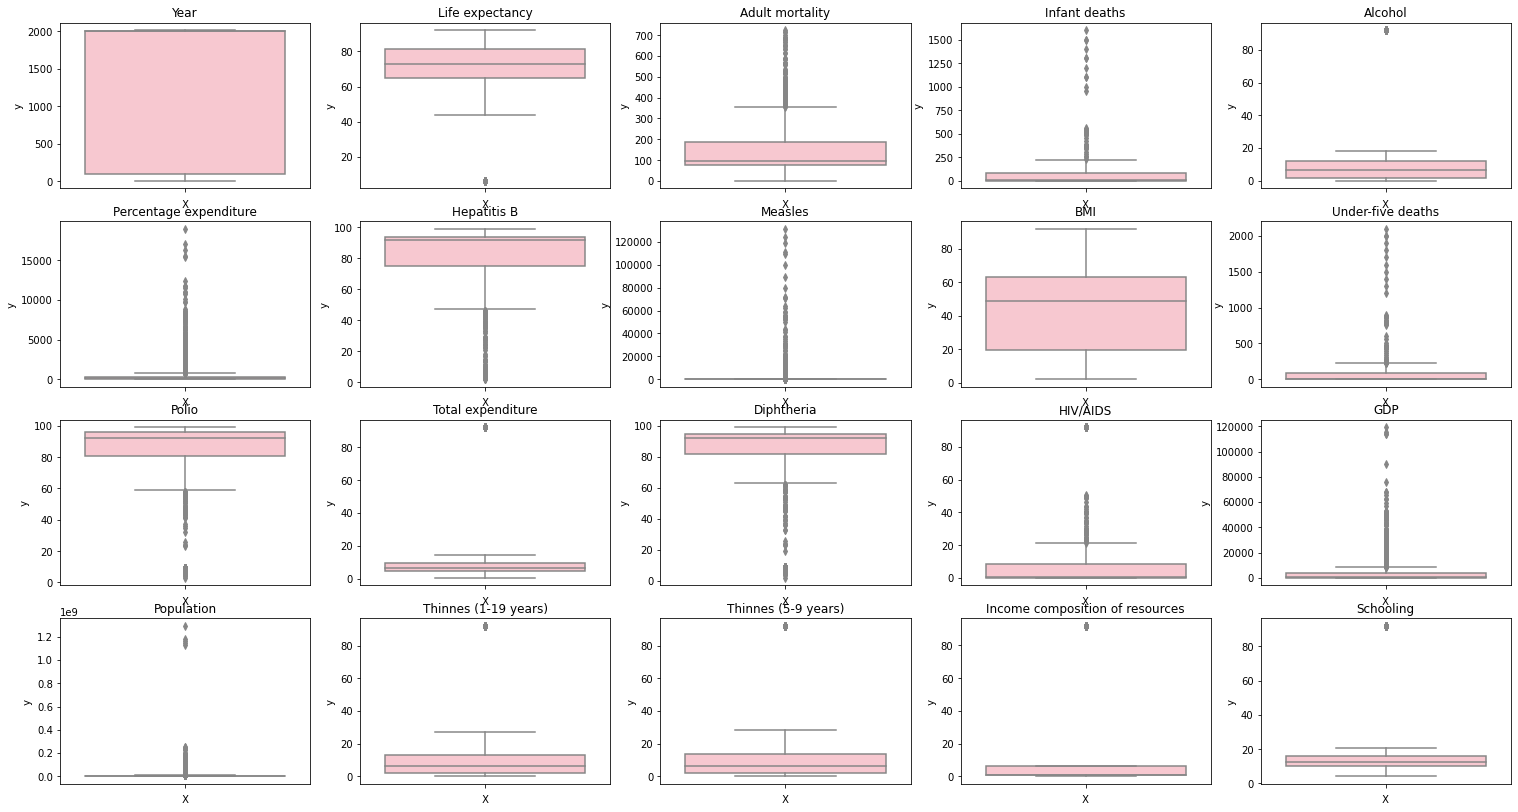

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns only
numeric = list(df.select_dtypes(include=np.number).columns)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
#axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()

assert len(numeric) == len(axes)

# Plot boxplot for each numeric column
for col, ax in zip(numeric, axes):
  sns.boxplot(y = df[col], ax=ax,color='pink')
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel=' X ', ylabel=' y ')

In [60]:
# Perform `describe` only for numeric columns
df[numeric].describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2.257000e+03,2257.000000,2257.000000,2257.000000,2257.000000
mean,1486.282056,69.955295,142.222685,43.105716,22.633957,530.003100,77.199646,1644.572707,47.179309,51.629863,80.375543,23.673425,80.781568,20.771378,4085.953115,1.070619e+07,22.865884,22.907621,19.783353,28.176916
std,859.342580,20.362166,116.879831,106.429747,35.465391,1529.258349,29.101459,8673.031387,29.398291,141.032564,27.435691,34.821669,27.042973,36.623147,10106.830882,6.057188e+07,35.397838,35.381799,36.772254,32.591776
min,6.400000,6.400000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,6.400000e+00,0.100000,0.100000,0.000000,4.200000
25%,92.000000,64.600000,78.000000,1.000000,1.620000,38.427908,75.000000,1.000000,19.700000,1.000000,81.000000,4.940000,82.000000,0.100000,92.000000,9.200000e+01,2.000000,2.100000,0.590000,10.400000
50%,2006.000000,73.000000,97.000000,7.000000,6.390000,92.000000,92.000000,49.000000,48.600000,8.000000,92.000000,6.400000,92.000000,0.400000,643.719110,3.841960e+05,6.300000,6.300000,0.729000,12.800000
75%,2010.000000,81.100000,189.000000,87.000000,11.840000,334.167337,94.000000,117.000000,63.000000,92.000000,96.000000,9.520000,95.000000,8.600000,3539.748800,3.839379e+06,13.300000,13.600000,6.400000,16.200000
max,2015.000000,92.000000,723.000000,1600.000000,92.000000,18961.348600,99.000000,131441.000000,92.000000,2100.000000,99.000000,92.000000,99.000000,92.000000,119172.741800,1.293859e+09,92.000000,92.000000,92.000000,92.000000


Create a histogram for each column using the built-in pandas method:

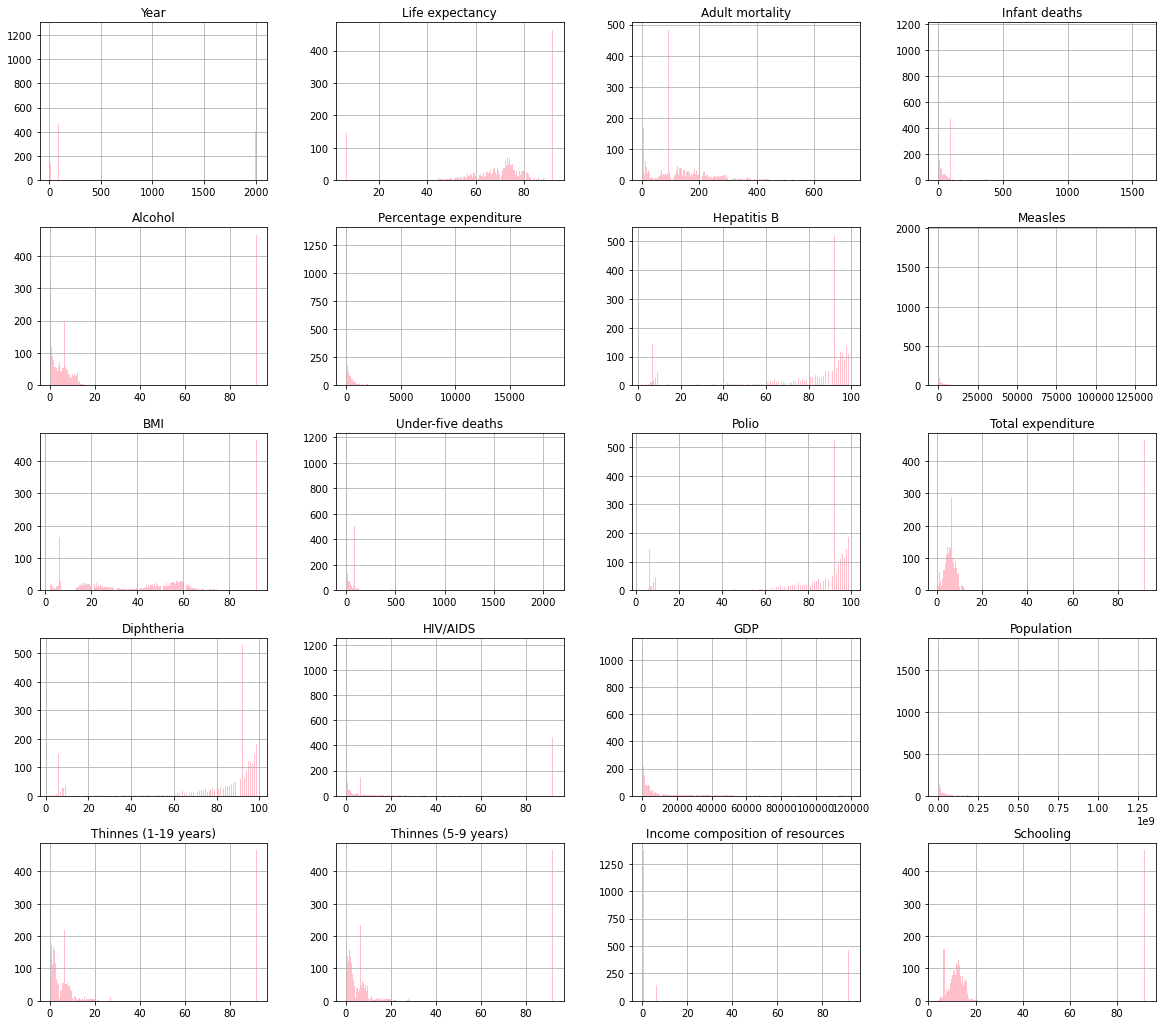

In [61]:
_ = df[numeric].hist(figsize=(20, 18), bins=200,color='pink')

 "trim" the data and keep only records where values in each column are within [$\alpha$, 1-$\alpha$] percentiles.

In [62]:
print(f"Records before: {len(df)}")

low, high = 0.01, 0.99
quantiles = df[numeric].quantile([low, high])
quantiles.drop(columns=['Year'], inplace=True)
for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col] >= low) & (df[col] <= high)
  df = df[mask]

print(f"Records after: {len(df)}")


Records before: 2257
Records after: 2018


In [63]:
quantiles

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling
0.01,6.4,6.00,0.0,0.01,1.067909,6.0,0.00,2.5,0.00,6.4,1.2956,6.0,0.1,6.400000,6.400000e+00,0.2,0.1,0.0,5.4
0.99,92.0,566.88,437.4,92.00,8257.648018,99.0,43398.96,92.0,531.68,99.0,92.0000,99.0,92.0,49558.324992,1.624146e+08,92.0,92.0,92.0,92.0


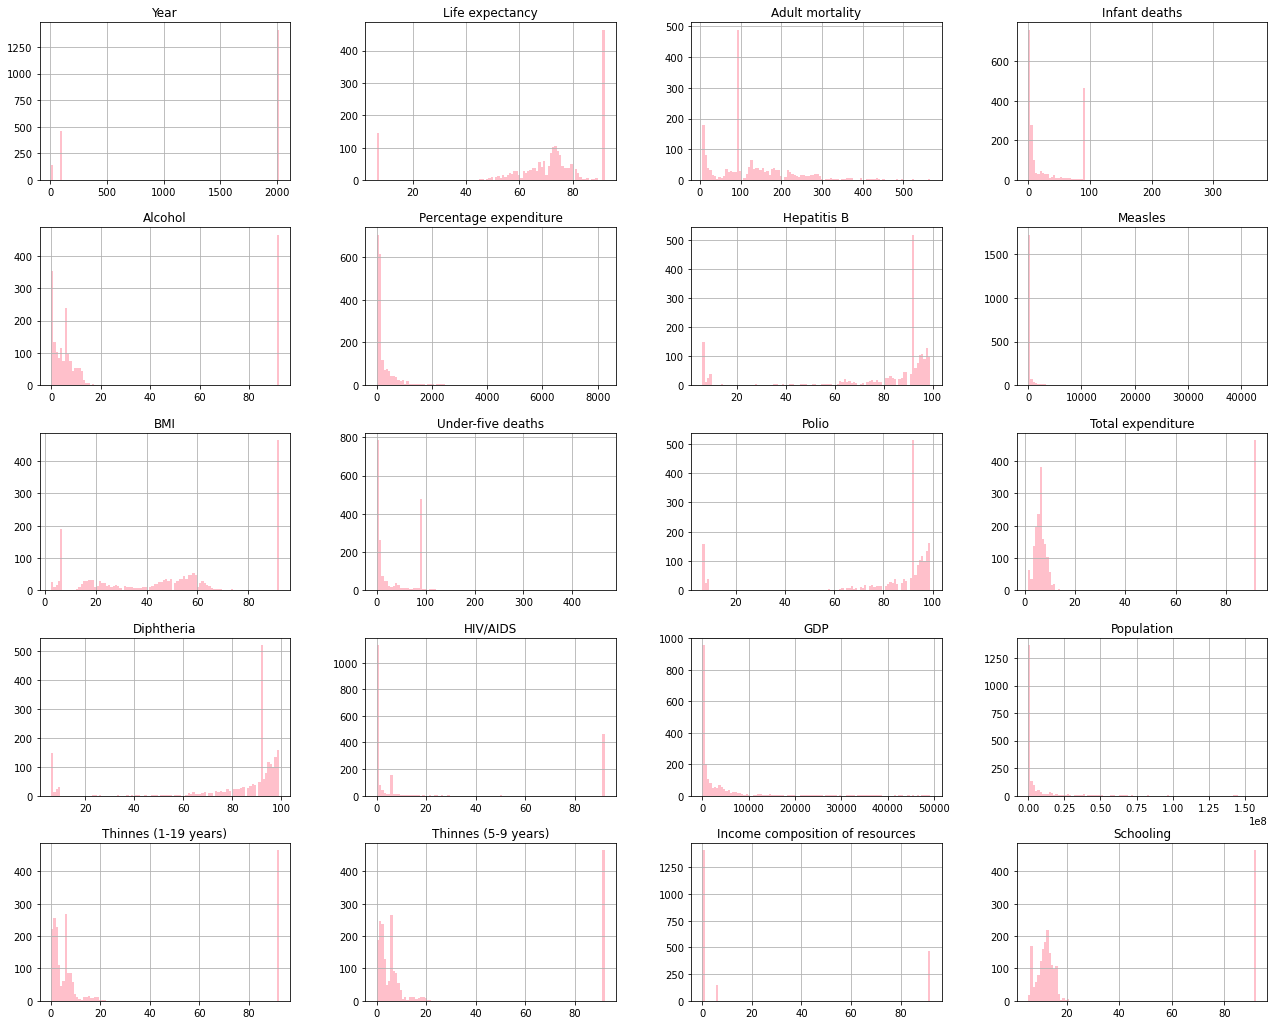

In [64]:
_ = df[numeric].hist(figsize=(22, 18), bins=100,color='pink')

So, I dropped about 300 records, but there is still a suspicious peak at '0' for the income composition of resources 

In [65]:
print(f"Recods before: {len(df)}")
df = df[df['Income composition of resources'] > 1e-6]
print(f"Recods after: {len(df)}")

Recods before: 2018
Recods after: 1976


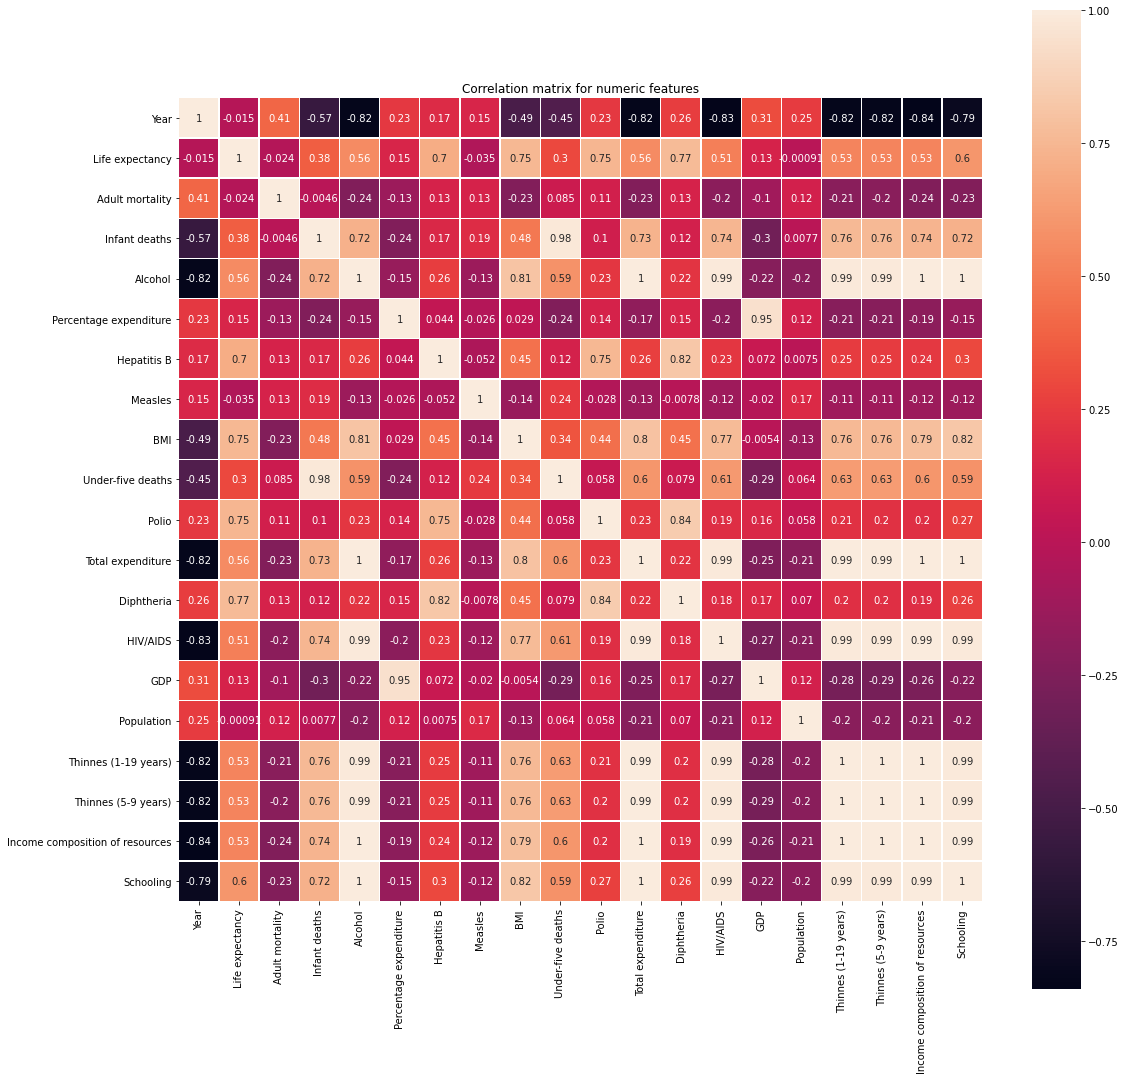

In [66]:
correlations = df[numeric].corr()

plt.figure(figsize=(18,18))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.3)
plt.title("Correlation matrix for numeric features")
plt.show()

 relationship between durability and each feature:

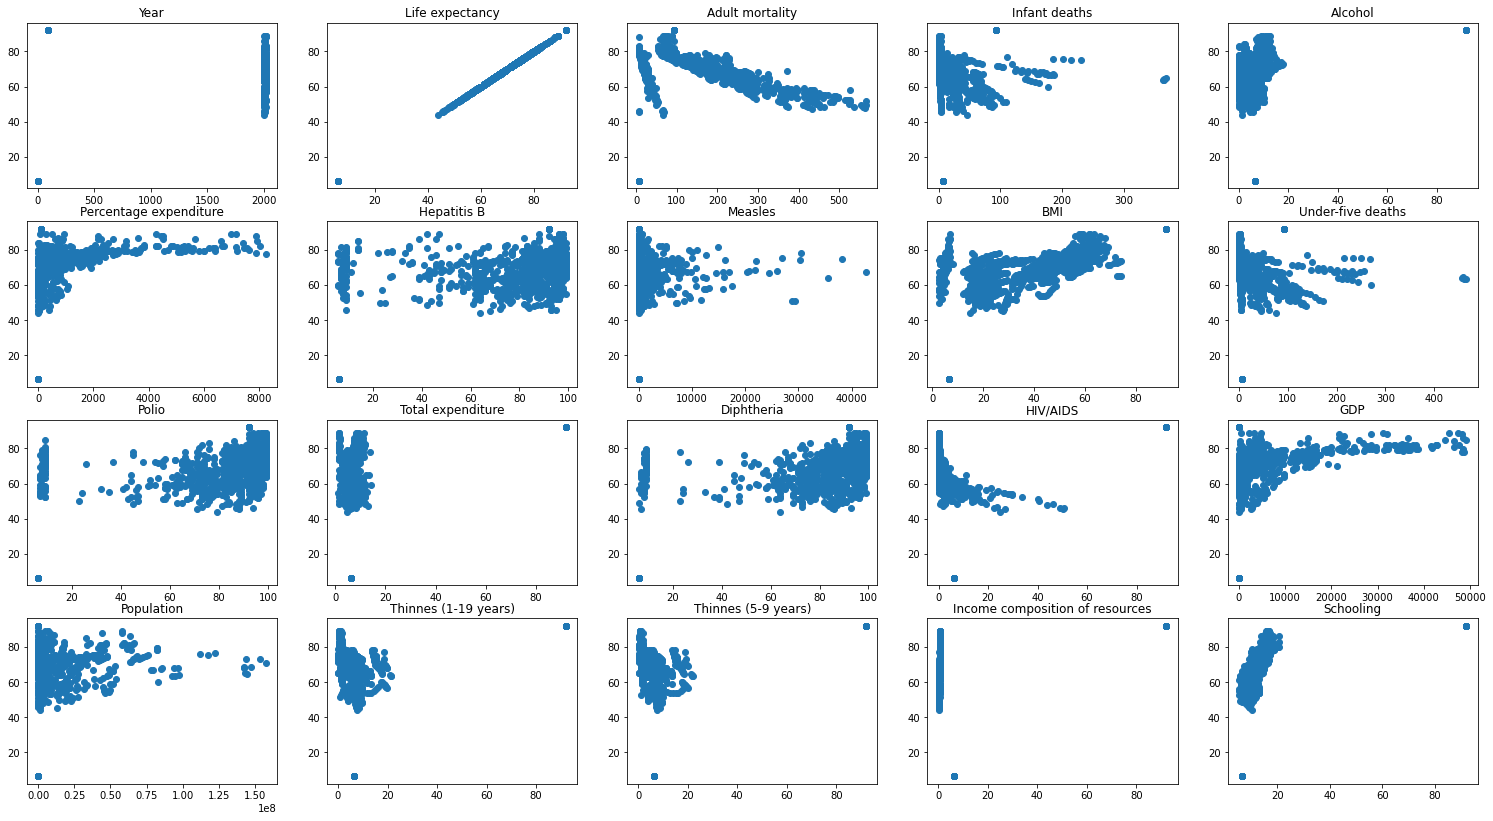

In [67]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
axes = axes.ravel()

for ax, col in zip(axes, numeric):
  ax.scatter(df[col], df['Life expectancy'])
  ax.set_title(col)

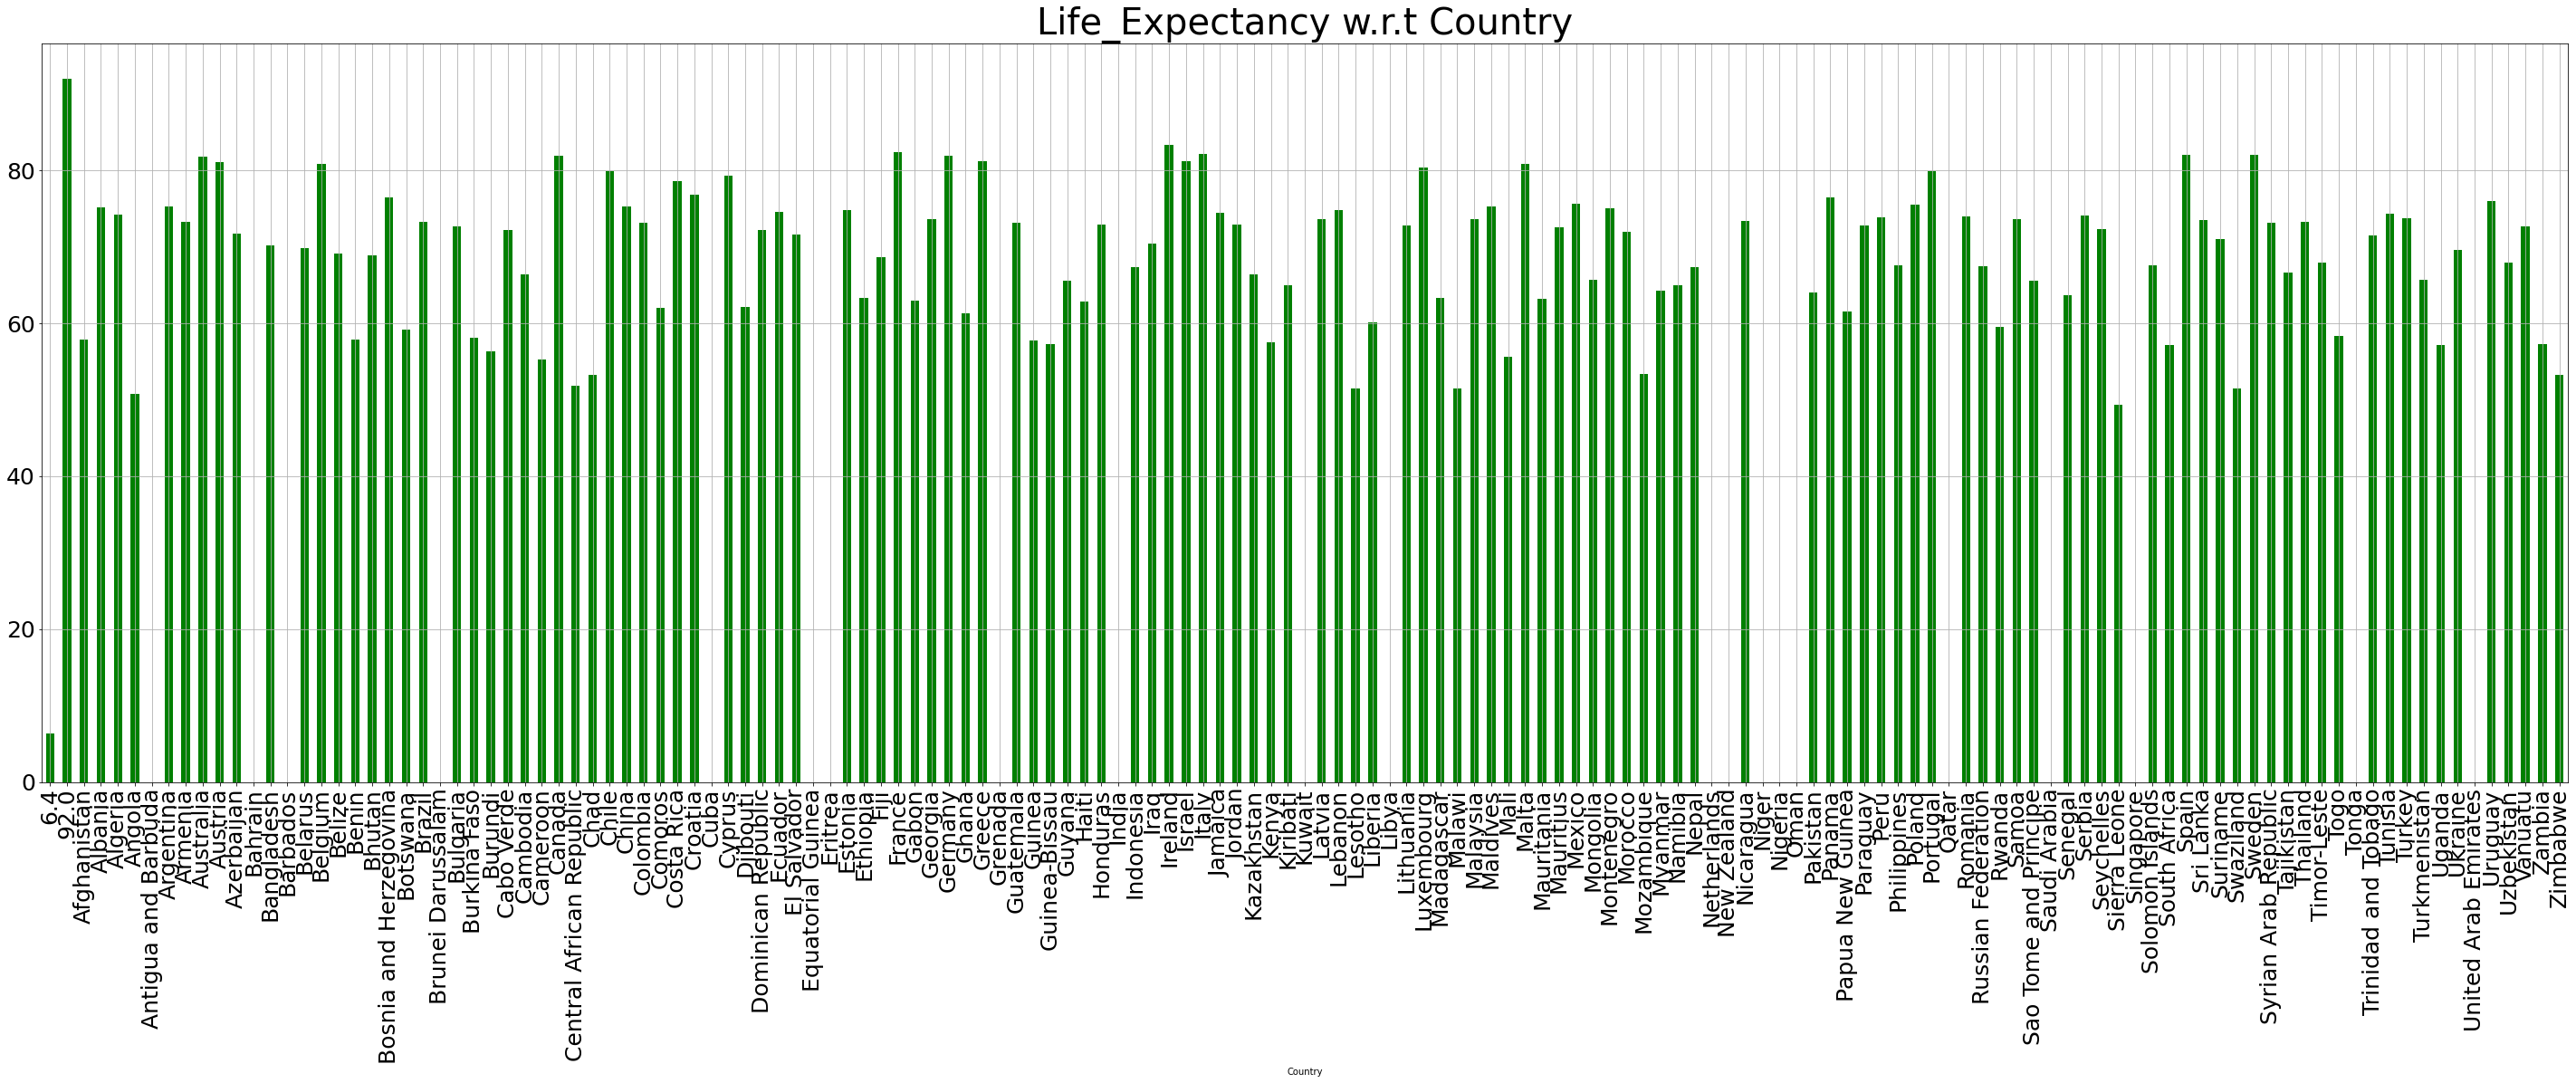

In [68]:
countries = df.groupby('Country')['Life expectancy'].mean()

ax = countries.plot(kind='bar', figsize=(50,15), fontsize=25,color='green')
ax.set_title("Life_Expectancy w.r.t Country",fontsize=40)
ax.grid()

remove these "empty" categories from the general list:
# select only categorical columns

In [69]:
categorical = list(df.select_dtypes('category').columns)

for col in categorical:
  df[col].cat.remove_unused_categories()

# ML-specific preprocessing

## Dummy variables (one-hot encoding)

Overall, we have 20 columns with 1 target variable.

Among them, i will drop 'Country', 'Continent' and 'Year' features. 

In [70]:
columns = numeric + categorical
for x in "Country", "Continent", "Year":
  columns.remove(x)
df = df[columns]

In [71]:
ddf = pd.get_dummies(df, columns=['Status'])

In [72]:
ddf

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,GDP,Population,Thinnes (1-19 years),Thinnes (5-9 years),Income composition of resources,Schooling,Status_6.4,Status_92.0,Status_Developed,Status_Developing
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0,0,1
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0,0,1
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0,0,1
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0,0,1
5,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,102.0,66.0,...,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,56.6,429.0,26.0,6.09,92.602336,97.0,0.0,3.3,39.0,95.0,...,955.648466,1471826.0,6.5,6.4,0.464,9.8,0,0,0,1
2449,54.9,464.0,28.0,6.00,63.750530,94.0,0.0,29.9,42.0,93.0,...,839.927936,14386649.0,6.8,6.7,0.452,10.1,0,0,0,1
2450,52.4,527.0,29.0,5.21,53.308581,9.0,9696.0,29.4,44.0,89.0,...,713.635620,1486317.0,7.1,7.0,0.436,10.0,0,0,0,1
2453,46.6,67.0,29.0,3.88,29.814566,72.0,242.0,28.2,46.0,73.0,...,396.998217,1332999.0,8.2,8.2,0.414,9.6,0,0,0,1


## Train/test split

In [73]:
from sklearn.model_selection import train_test_split

Y = ddf.pop("Life expectancy")
Y = Y.values
X = ddf.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")


Before:
	X: (1976, 22); Y: (1976,)
Train:
	X: (1383, 22); Y: (1383,)
Test:
	X: (593, 22); Y: (593,)


## Utilities

functions for model evaluation on test data.

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

In [75]:
def report_quality(model, X_test, Y_test):
  Y_pred = model.predict(X_test)
  print(f"R^2:\t{r2_score(Y_test, Y_pred)}")
  print(f"RMSE:\t{sqrt(mean_squared_error(Y_test, Y_pred))}")
  print(f"MAE:\t{mean_absolute_error(Y_test, Y_pred)}")
  return Y_pred

# Linear models

## Linear regression

In [76]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train, Y_train)
Y_pred = report_quality(lm, X_test, Y_test)

R^2:	0.9858260646493092
RMSE:	2.391488840017217
MAE:	1.561425000602983


[Text(0.5, 0, 'observed'),
 Text(0, 0.5, 'predicted'),
 Text(0.5, 1.0, 'Observed vs predicted')]

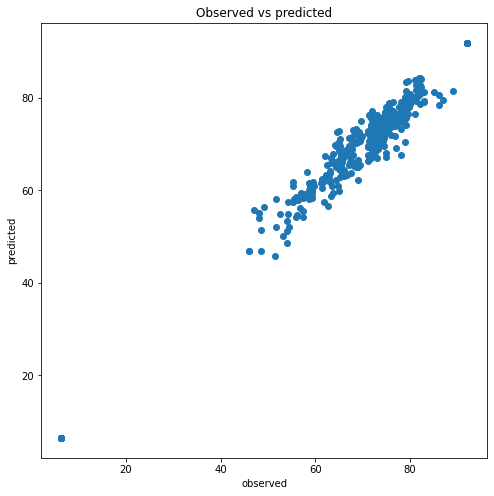

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(Y_test, Y_pred)
plt.gca().set(xlabel='observed', ylabel='predicted', title='Observed vs predicted')

In [78]:
# Model coefficients
lm.coef_

array([-1.31517026e-02,  1.46680350e-01, -1.96812495e-01,  1.44863401e-03,
       -2.63443308e-03, -2.67253100e-05,  6.58740725e-03, -1.13200841e-01,
        2.48742748e-03,  1.88793308e-01,  4.44005843e-03, -3.75996066e-01,
       -1.68376112e-04,  1.67885915e-08,  1.95141507e-01, -2.53466193e-01,
        4.36986577e+01, -3.82009690e-01,  8.97913369e+02, -2.68930791e+03,
        1.21511341e+03,  1.21392676e+03])

In [79]:
assert len(ddf.columns) == len(lm.coef_)
#looj for powerful fwatures
maxposind = lm.coef_.argmax()
print("Highest positive contribution:")
print(f"\tColumn: {ddf.columns[maxposind]}")
print(f"\tWeight: {lm.coef_[maxposind]}")

maxnegind = (-lm.coef_).argmax()
print("Highest negative contribution:")
print(f"\tColumn: {ddf.columns[maxnegind]}")
print(f"\tWeight: {lm.coef_[maxnegind]}")

Highest positive contribution:
	Column: Status_Developed
	Weight: 1215.1134052388215
Highest negative contribution:
	Column: Status_92.0
	Weight: -2689.307910220711


## Lasso

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize=True)
lasso.fit(X_train, Y_train)
_ = report_quality(lasso, X_test, Y_test)

R^2:	-0.007288691460523022
RMSE:	20.16044499508218
MAE:	13.649053125217193


In [81]:
lasso = Lasso(normalize=True, alpha=1e-2)
lasso.fit(X_train, Y_train)
_ = report_quality(lasso, X_test, Y_test)

R^2:	0.9618346315193389
RMSE:	3.9242608226071476
MAE:	2.5903788362044082


Text(0.5, 1.0, 'Lasso coefficients as a function of the regularization')

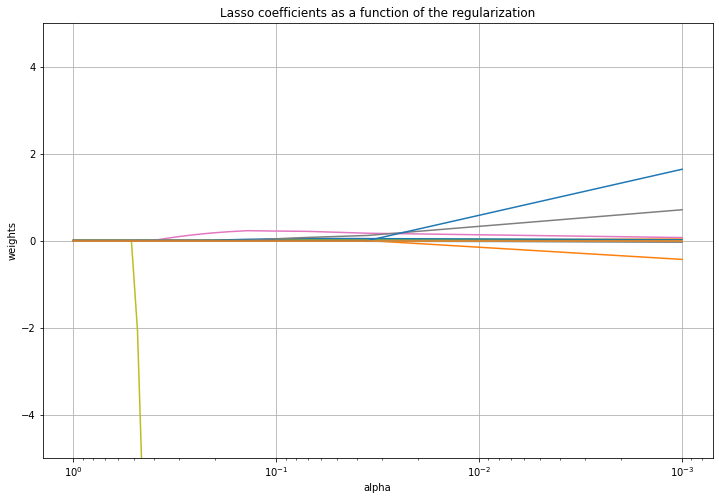

In [82]:
alphas = np.linspace(1e-3, 1, 30)
model = Lasso(normalize=True)

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, Y_train)
    coefs.append(model.coef_)

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax.set_xlabel('alpha')
ax.set_ylabel('weights')
ax.set_ylim(-5, 5)
ax.grid()
ax.set_title('Lasso coefficients as a function of the regularization')

# Cross-validation

In [83]:
from sklearn.model_selection import cross_val_score

lm = LinearRegression(normalize=True)

scores = cross_val_score(lm, X_train, Y_train, cv=10)
scores

array([0.98276323, 0.98908226, 0.97870956, 0.98763617, 0.99393488,
       0.98912759, 0.97896846, 0.99077659, 0.98463456, 0.9881131 ])

In [84]:
print(f"R^2: {scores.mean():.3f}")

R^2: 0.986


# Grid search

i use cross-validation to measure average performance of a particular model.

Model with best hyperparameters is returned.


In [85]:
from sklearn.model_selection import GridSearchCV

alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

model = Lasso(normalize=True, max_iter=2000)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), cv=5)
grid.fit(X_train, Y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

C:\Users\j.smolkina\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4446.3425196537455, tolerance: 51.4517322965642
  model = cd_fast.enet_coordinate_descent(
C:\Users\j.smolkina\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4453.012372257285, tolerance: 54.24537356238698
  model = cd_fast.enet_coordinate_descent(
C:\Users\j.smolkina\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4746.849987448001, tolerance: 49.937637439421344
  model = cd_fast.enet_coordinate_descent(
C:\Users\j.smolkina\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

Best params: {'alpha': 1e-08}
Best cross validaton score 0.9809636380596238


C:\Users\j.smolkina\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5840.347492156537, tolerance: 65.94157773535792
  model = cd_fast.enet_coordinate_descent(


In [86]:
lasso = Lasso(alpha=0.0001, normalize=True, max_iter=2000)
lasso.fit(X_train, Y_train)
lasso.score(X_test, Y_test)

C:\Users\j.smolkina\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314.584959843034, tolerance: 65.94157773535792
  model = cd_fast.enet_coordinate_descent(


0.9788401811033446